#Importing Important Libraries


In [78]:
# Importing Essential Libraries And Functions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import datetime

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df_copy = df.copy()

In [4]:
df.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [5]:
#making id column as the index
df.set_index("id",inplace=True)

In [6]:
df.shape


(6700, 15)

In [7]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,,
1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [8]:
def dtype_check(data):
  for i in data.columns:
    print(f"Data type of \"{i}\" is ---> {data[i].dtype}")

In [9]:
def unique_check(data):
  for i in data.columns:
    print(f"Number of Unique Elements in \"{i}\" column is ---> {data[i].nunique()}")

In [10]:
dtype_check(df)

Data type of "departure city" is ---> object
Data type of "discount" is ---> float64
Data type of "price" is ---> float64
Data type of "no of items" is ---> int64
Data type of "location" is ---> object
Data type of "class" is ---> object
Data type of "segment" is ---> object
Data type of "sub-class" is ---> object
Data type of "delivery type" is ---> object
Data type of "RID" is ---> int64
Data type of "profit" is ---> float64
Data type of "delivery date" is ---> object
Data type of "address code" is ---> int64
Data type of "departure state" is ---> object
Data type of "placement date" is ---> object


In [11]:
unique_check(df)

Number of Unique Elements in "departure city" column is ---> 469
Number of Unique Elements in "discount" column is ---> 12
Number of Unique Elements in "price" column is ---> 4437
Number of Unique Elements in "no of items" column is ---> 14
Number of Unique Elements in "location" column is ---> 4
Number of Unique Elements in "class" column is ---> 3
Number of Unique Elements in "segment" column is ---> 3
Number of Unique Elements in "sub-class" column is ---> 17
Number of Unique Elements in "delivery type" column is ---> 4
Number of Unique Elements in "RID" column is ---> 6700
Number of Unique Elements in "profit" column is ---> 5285
Number of Unique Elements in "delivery date" column is ---> 37
Number of Unique Elements in "address code" column is ---> 562
Number of Unique Elements in "departure state" column is ---> 47
Number of Unique Elements in "placement date" column is ---> 37


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6700 entries, 1 to 6700
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   departure city   6700 non-null   object 
 1   discount         6700 non-null   float64
 2   price            6700 non-null   float64
 3   no of items      6700 non-null   int64  
 4   location         6700 non-null   object 
 5   class            6700 non-null   object 
 6   segment          6700 non-null   object 
 7   sub-class        6700 non-null   object 
 8   delivery type    6699 non-null   object 
 9   RID              6700 non-null   int64  
 10  profit           6700 non-null   float64
 11  delivery date    6700 non-null   object 
 12  address code     6700 non-null   int64  
 13  departure state  6700 non-null   object 
 14  placement date   6700 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 837.5+ KB


In [13]:
#checking for null values
df.isna().sum()

departure city     0
discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery type      1
RID                0
profit             0
delivery date      0
address code       0
departure state    0
placement date     0
dtype: int64

In [14]:
#dropping the row containing the null value
df.dropna(inplace = True)

In [15]:
#checking for duplicate values
df[df.duplicated()]

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
id,,,,,,,,,,,,,,,


In [16]:
df.describe()

,discount,price,no of items,RID,profit,address code
count,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000
mean,0.155899,234.456367,3.798627,4954.326019,29.124000,54713.799373
std,0.205929,641.483317,2.225472,2921.519449,230.730047,32091.912840
min,0.000000,0.836000,1.000000,1.000000,-6599.978000,1040.000000
25%,0.000000,17.340000,2.000000,2389.500000,1.713700,22204.000000
50%,0.200000,54.960000,3.000000,4941.000000,8.802000,55113.000000
75%,0.200000,212.940000,5.000000,7507.500000,30.023400,90004.000000
max,0.800000,22638.480000,14.000000,9990.000000,8399.976000,99301.000000


##Outlier Detection


In [17]:
df.profit.describe()

count    6699.000000
mean       29.124000
std       230.730047
min     -6599.978000
25%         1.713700
50%         8.802000
75%        30.023400
max      8399.976000
Name: profit, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


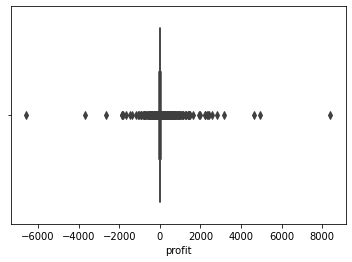

In [18]:
sns.boxplot(df['profit'])
plt.show()

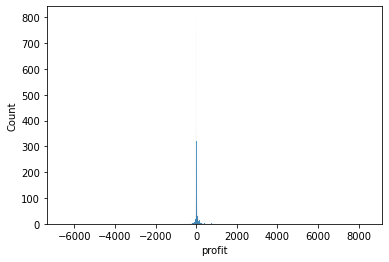

In [19]:
sns.histplot(df['profit'])
plt.show()

## EDA

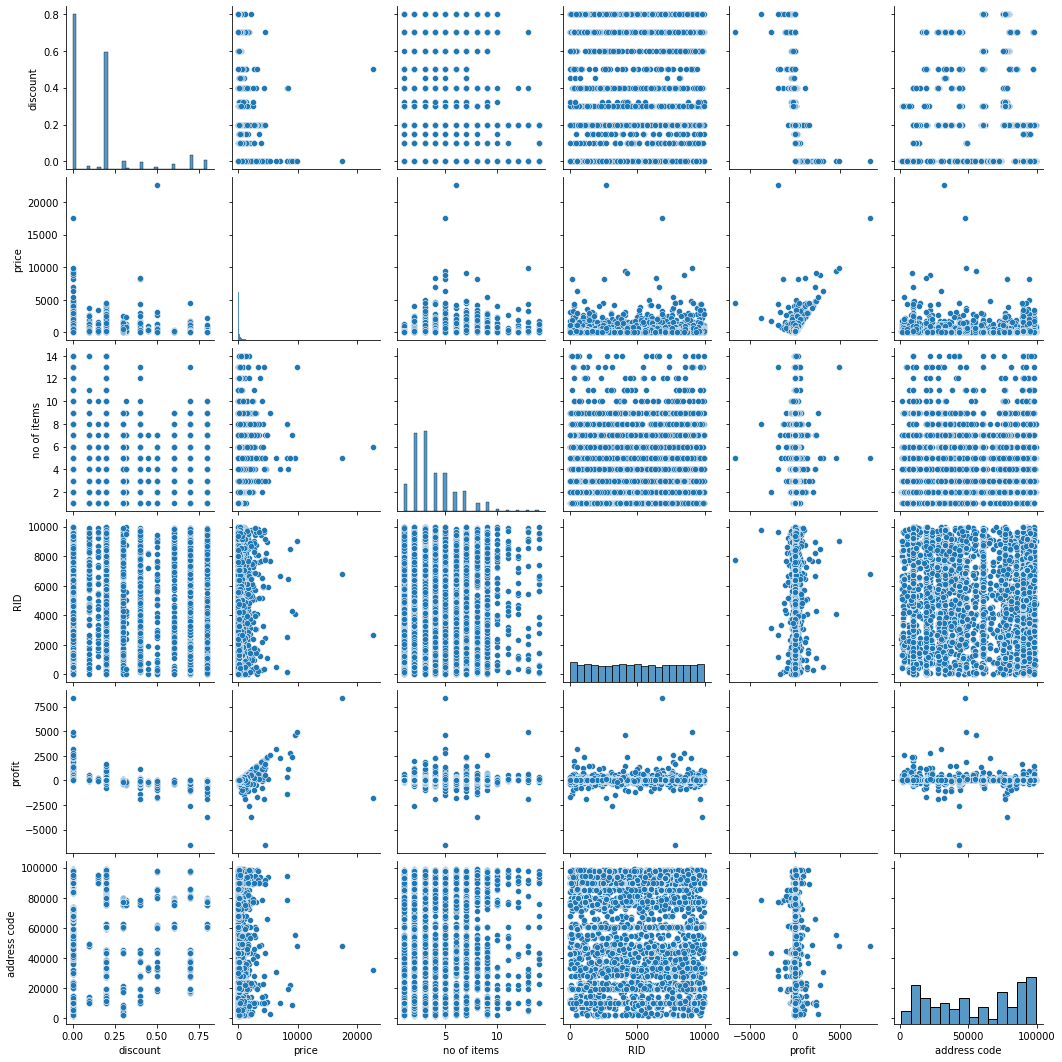

In [20]:
sns.pairplot(df)
plt.show()

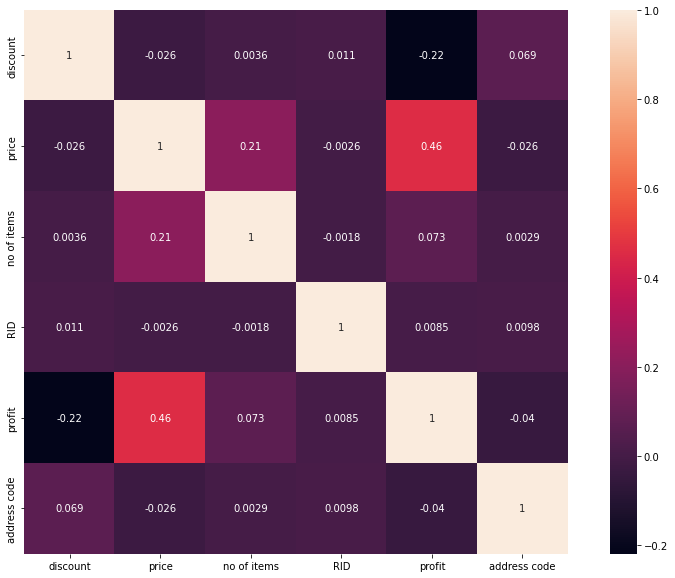

In [21]:
plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, square=True, annot=True)
plt.show()

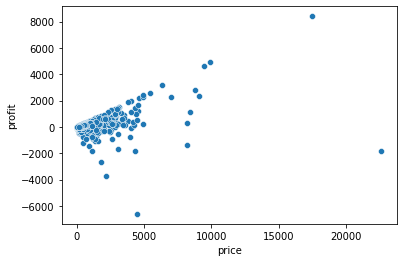

In [22]:
sns.scatterplot(x='price',y='profit',data=df)
plt.show()

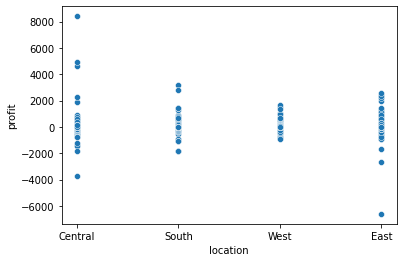

In [23]:
sns.scatterplot(x='location',y='profit',data=df)
plt.show()

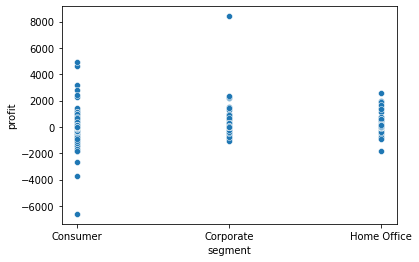

In [24]:
sns.scatterplot(x='segment',y='profit',data=df)
plt.show()

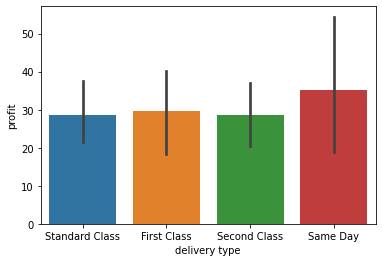

In [25]:
sns.barplot(x='delivery type',y='profit',data=df)
plt.show()

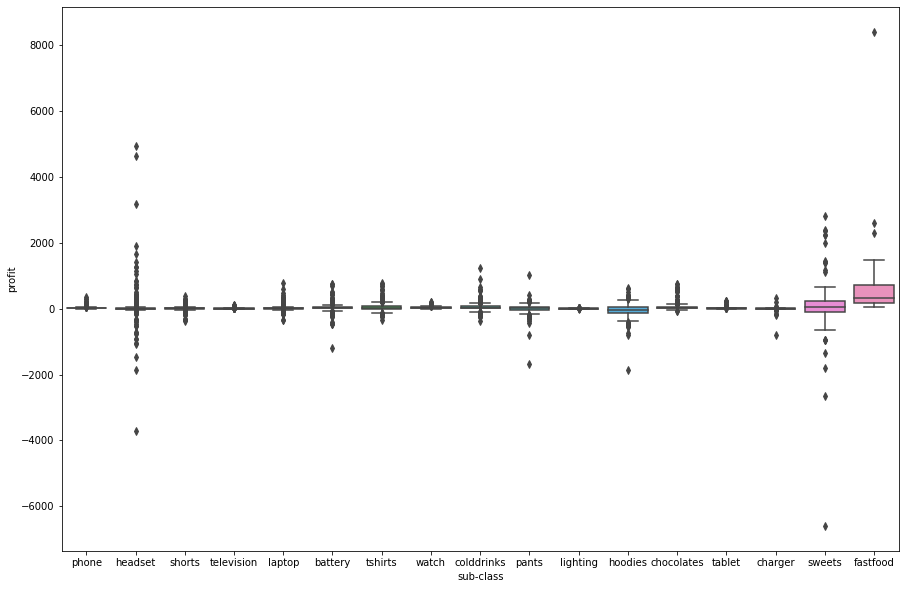

In [26]:
plt.subplots(figsize=(15, 10))
sns.boxplot(x='sub-class',y='profit',data=df)
plt.show()

##Feature Engineering

In [27]:
df['delivery date'] = pd.to_datetime(df['delivery date'])
df['placement date'] = pd.to_datetime(df['placement date'])


In [28]:
#checking all the unqiue days, months and year of delivery date
print("Unique Number of Delivery Days",df['delivery date'].dt.day.unique())
print("Unique Number of Delivery Months",df['delivery date'].dt.month.unique())
print("Unique Number of Delivery Years",df['delivery date'].dt.year.unique())

Unique Number of Delivery Days [1]
Unique Number of Delivery Months [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique Number of Delivery Years [2018 2019 2020 2021]


In [29]:
#no use of days as it is going to be a constant column

In [30]:
#checking all the unqiue days, months and year of placement date

print("Unique Number of Placement Days",df['placement date'].dt.day.unique())
print("Unique Number of Placement Months",df['placement date'].dt.month.unique())
print("Unique Number of Placement Years",df['placement date'].dt.year.unique())

#no use of days as it is going to be a constant column

Unique Number of Placement Days [1]
Unique Number of Placement Months [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique Number of Placement Years [2018 2019 2020 2021]


#Outlier Treatment 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


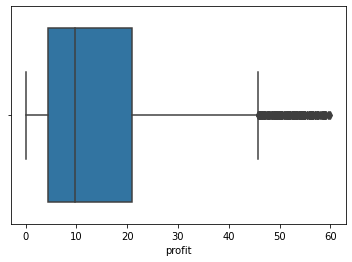

In [31]:
#removing the outliers for the target column
# keeping only the non negative numbers 
df=df[df['profit']>0]
df=df[df['profit']<60]

sns.boxplot(df['profit'])
plt.show()

Converting date columns

In [32]:
#slicing out the month and year out of delivery date column
df['delivery_month'] = df['delivery date'].dt.month
df['delivery_year'] = df['delivery date'].dt.year

In [33]:
#slicing out the month and year out of placement date column
df['placement_month'] = df['placement date'].dt.month
df['placement_year'] = df['placement date'].dt.year

Target Encoding With the mean values 

In [34]:
def labelling(data, column):
  add_code = data.groupby(column)['profit'].mean().to_dict()
  column_name = column+'_mean_encoded'
  data[column_name] = data[column].map(add_code)
  data.drop(column,axis = 1, inplace = True)
  return (data, add_code)

In [35]:
df, dep_city_code  = labelling(df, "departure city")
df, location_code  = labelling(df, "location")
df, class_code  = labelling(df, "class")
df, segment_code  = labelling(df, "segment")
df, sub_class_code  = labelling(df, "sub-class")
df, del_type_code  = labelling(df, "delivery type")
df, dept_state_code  = labelling(df, "departure state")


In [36]:
df.head()

,discount,price,no of items,RID,profit,delivery date,address code,placement date,delivery_month,delivery_year,placement_month,placement_year,departure city_mean_encoded,location_mean_encoded,class_mean_encoded,segment_mean_encoded,sub-class_mean_encoded,delivery type_mean_encoded,departure state_mean_encoded
id,,,,,,,,,,,,,,,,,,,
1,0.2,16.448,2,7981,5.5512,2018-01-01,77095,2018-01-01,1,2018,1,2018,13.462195,14.850994,12.533484,14.884849,15.187445,15.012935,12.596681
2,0.0,29.700,5,6334,13.3650,2018-01-01,48185,2018-01-01,1,2018,1,2018,14.618082,14.850994,12.533484,14.884849,13.737019,15.012935,18.534417
3,0.0,14.730,3,6333,4.8609,2018-01-01,48185,2018-01-01,1,2018,1,2018,14.618082,14.850994,18.513155,14.884849,15.292327,15.012935,18.534417
4,0.0,43.920,3,6332,12.7368,2018-01-01,48185,2018-01-01,1,2018,1,2018,14.618082,14.850994,12.533484,14.884849,7.001167,15.012935,18.534417
5,0.0,66.580,2,6331,15.9792,2018-01-01,48185,2018-01-01,1,2018,1,2018,14.618082,14.850994,12.533484,14.884849,13.843354,15.012935,18.534417


#Feature Selection

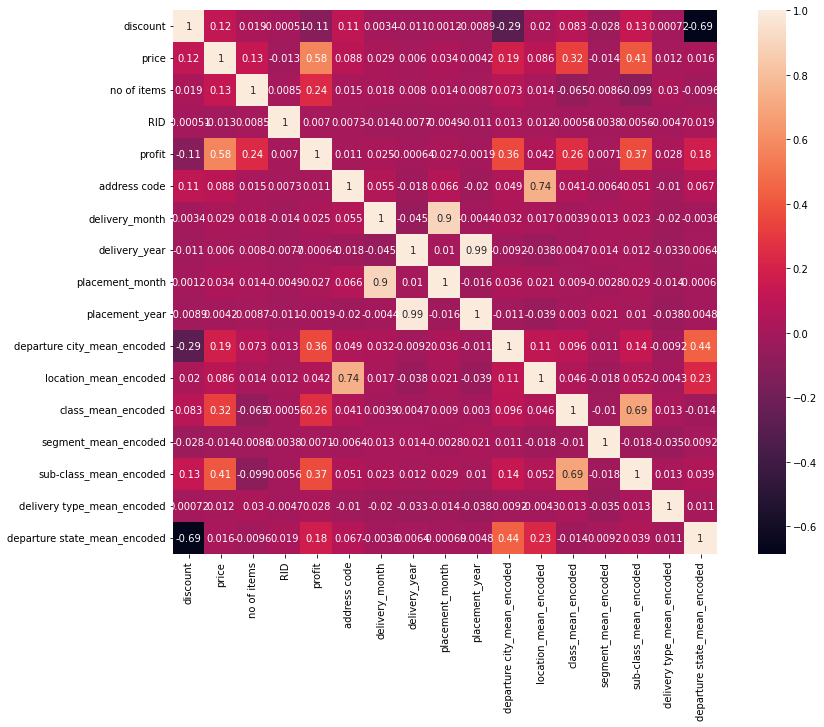

In [37]:
plt.subplots(figsize=(15, 10))
corr = df.corr()
sns.heatmap(corr, square=True, annot=True)
plt.show()

Filter Method using the HeatMap 

In [38]:
df.drop(['RID', 'address code',  'delivery date',
       'placement date','delivery_month', 'delivery_year', 'placement_month', 'placement_year', 'segment_mean_encoded' ],axis=1,inplace=True)

#Modelling

In [39]:
RMSE_Score = []
R2_Score = []
Algorithm = []

In [40]:
X = df.drop('profit',axis=1).values
y = df['profit'].values

In [41]:
X[0]

array([ 0.2       , 16.448     ,  2.        , 13.46219535, 14.85099354,
       12.5334842 , 15.18744453, 15.01293471, 12.59668105])

In [42]:
y[0]

5.5512

Data Splitting

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

Linear Regression

In [44]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = regressor.predict(X_test)

In [46]:
r2 = r2_score(y_test, y_pred) 
print('r2 score for perfect model is', r2) 

r2 score for perfect model is 0.4451855406433597


In [47]:
MSE = np.square(np.subtract(y_test, y_pred)).mean() 
 
RMSE = math.sqrt(MSE)

print('RMSE Score', RMSE)

RMSE Score 10.712894530030532


In [48]:
Algorithm.append('Linear Regression')
R2_Score.append(r2)
RMSE_Score.append(RMSE)

Desicion Tree

In [49]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [50]:
y_pred=regressor.predict(X_test)

In [51]:
r2 = r2_score(y_test, y_pred) 
print('r2 score for perfect model is', r2) 

r2 score for perfect model is 0.688122615526985


In [52]:
MSE = np.square(np.subtract(y_test, y_pred)).mean() 
 
RMSE = math.sqrt(MSE)

print('RMSE Score', RMSE)

RMSE Score 8.032021928066287


In [53]:
Algorithm.append('Desicion Tree Regression')
R2_Score.append(r2)
RMSE_Score.append(RMSE)

RandomForest Regressor

In [54]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [55]:
y_pred=regressor.predict(X_test)

In [56]:
r2 = r2_score(y_test, y_pred) 
print('r2 score for perfect model is', r2) 

r2 score for perfect model is 0.7947928365018693


In [57]:
MSE = np.square(np.subtract(y_test, y_pred)).mean() 
 
RMSE = math.sqrt(MSE)

print('RMSE Score', RMSE)

RMSE Score 6.515221759240882


In [58]:
Algorithm.append('RandomForest Regression')
R2_Score.append(r2)
RMSE_Score.append(RMSE)

XGBoost Regressor

In [59]:
clf = xgb.XGBRegressor(n_estimators=300, random_state=0)
clf.fit(X_train, y_train)

# Predicting the Test Set Results
y_pred = clf.predict(X_test)

[19:35:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [60]:
r2 = r2_score(y_test, y_pred) 
print('r2 score for perfect model is', r2) 

r2 score for perfect model is 0.8106392153196404


In [61]:
MSE = np.square(np.subtract(y_test, y_pred)).mean() 
 
RMSE = math.sqrt(MSE)

print('RMSE Score', RMSE)

RMSE Score 6.258611100206733


In [62]:
Algorithm.append('XGBoost Regression')
R2_Score.append(r2)
RMSE_Score.append(RMSE)

Comparison


In [63]:
comparison=pd.DataFrame({'Algorithm':Algorithm,'RMSE_score':RMSE_Score, 'R2_Score':R2_Score})
comparison

,Algorithm,RMSE_score,R2_Score
0,Linear Regression,10.712895,0.445186
1,Desicion Tree Regression,8.032022,0.688123
2,RandomForest Regression,6.515222,0.794793
3,XGBoost Regression,6.258611,0.810639


In [64]:
# Chossing the model with the best results thats is XGBoost

#Prediction

In [65]:
test = pd.read_csv('/content/test.csv')

In [66]:
test_copy = test.copy(deep = True)

In [67]:
#Dropping features which are not of use
test.drop(['id','RID', 'address code', 'segment',
       'delivery date', 'placement date' ],axis=1,inplace=True)

In [68]:
def mapping(data, column, agg):
  column_name = column + '_mean_encoded'
  data[column_name] = data[column].map(agg)
  data[column_name].fillna(data[column_name].mean(), inplace = True)
  data.drop(column,axis = 1, inplace = True)
  return data

In [69]:
test = mapping(test, 'departure city', dep_city_code)
test = mapping(test, 'location', location_code)
test = mapping(test, 'sub-class', sub_class_code)
test = mapping(test, 'delivery type', del_type_code)
test = mapping(test, 'departure state', dept_state_code)
test = mapping(test, 'class', class_code)

In [70]:
y_final=clf.predict(test.values)

In [71]:
y_final

array([11.909321 , 36.62943  ,  3.7488916, ..., 39.45345  , 27.664587 ,
        1.997308 ], dtype=float32)

In [72]:
test_copy

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date
0,6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,2408,2021-01-01,94122,California,2021-01-01
1,6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,2409,2021-01-01,94122,California,2021-01-01
2,6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,5425,2021-01-01,6708,Connecticut,2021-01-01
3,6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,7408,2021-01-01,60653,Illinois,2021-01-01
4,6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,733,2021-01-01,98115,Washington,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,9990,New York City,0.0,31.920,4,East,kariox,Consumer,laptop,Second Class,1171,2021-12-01,10035,New York,2021-12-01
3290,9991,New York City,0.0,19.440,3,East,kariox,Consumer,phone,Second Class,1170,2021-12-01,10035,New York,2021-12-01
3291,9992,New York City,0.0,272.940,3,East,kariox,Consumer,laptop,Second Class,1169,2021-12-01,10035,New York,2021-12-01
3292,9993,San Francisco,0.2,113.568,2,West,qexty,Consumer,tshirts,Standard Class,414,2021-12-01,94110,California,2021-12-01


In [73]:
profit = {'profit': y_final, 'id': test_copy.id}     
df_predicted = pd.DataFrame(profit) 
# df_predicted.set_index(test_copy.id)
df_predicted

,profit,id
0,11.909321,6701
1,36.629429,6702
2,3.748892,6703
3,5.195766,6704
4,29.971216,6705
...,...,...
3289,13.166822,9990
3290,9.910204,9991
3291,39.453449,9992
3292,27.664587,9993


In [74]:
test_copy = pd.merge(test_copy, df_predicted , on='id')


In [75]:
test_copy.set_index("id",inplace=True)

Final DataFrame with Predictions

In [76]:
test_copy.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,delivery date,address code,departure state,placement date,profit
id,,,,,,,,,,,,,,,
6701,San Francisco,0.0,24.200,5,West,kariox,Consumer,television,Standard Class,2408,2021-01-01,94122,California,2021-01-01,11.909321
6702,San Francisco,0.2,359.976,3,West,fynota,Consumer,colddrinks,Standard Class,2409,2021-01-01,94122,California,2021-01-01,36.629429
6703,Waterbury,0.0,3.520,2,East,kariox,Consumer,television,Standard Class,5425,2021-01-01,6708,Connecticut,2021-01-01,3.748892
6704,Chicago,0.2,11.520,5,Central,kariox,Consumer,tablet,First Class,7408,2021-01-01,60653,Illinois,2021-01-01,5.195766
6705,Seattle,0.0,242.940,3,West,kariox,Home Office,laptop,Standard Class,733,2021-01-01,98115,Washington,2021-01-01,29.971216


In [77]:
#saving the dataframe into a csv file
test_copy.to_csv('Final.csv',index=False)